In [210]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [272]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

In [212]:
#READING THE DATASET

df = pd.read_csv("/content/drive/MyDrive/DATASET/SP 500 ESG Risk Ratings.csv")

In [213]:
#CHECKING THE HEAD

df.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [214]:
df["Controversy Level"].value_counts()

Moderate       197
Low            105
Significant     84
High            15
Severe           2
None             1
Name: Controversy Level, dtype: int64

In [215]:
#CHECKING THE SHAPE

print("SHAPE OF THE DATASET :",df.shape)

SHAPE OF THE DATASET : (503, 15)


In [216]:
#GETTING ALL THE ROWS AND COLUMNS

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [217]:
#CHECKING THE MISSING VALUES

print("ALL THE MISSING VALUES IN EACH FEATURE")
print("--------------------------------------")
df.isnull().sum()

ALL THE MISSING VALUES IN EACH FEATURE
--------------------------------------


Symbol                      0
Name                        0
Address                     2
Sector                      2
Industry                    2
Full Time Employees         7
Description                 2
Total ESG Risk score       70
Environment Risk Score     70
Governance Risk Score      70
Social Risk Score          70
Controversy Level          99
Controversy Score          70
ESG Risk Percentile        70
ESG Risk Level            127
dtype: int64

In [218]:
#CHECKING THE SUM OF THE MISSING VALUES

print("TOTAL NUMBER OF MISSING VALUES :",df.isnull().sum().sum())

TOTAL NUMBER OF MISSING VALUES : 661


<Axes: >

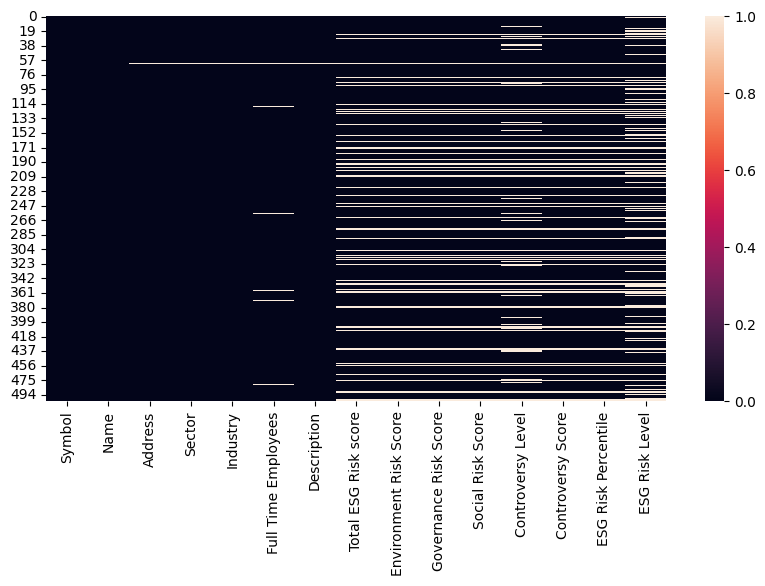

In [219]:
#CHECKING NULL VALUE ON THE HEATMAP

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

THIS DATASET CONTAINS LOTS OF MISSING VALUES

In [220]:
#CHECKING THE TOTAL NUMBER OF DUPLICATE VALUES

print("Total Number of Duplicate values in the dataset :",df.duplicated().sum())

Total Number of Duplicate values in the dataset : 0


In [221]:
#CHEKCING NULL AND DATATYPES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 501 non-null    object 
 3   Sector                  501 non-null    object 
 4   Industry                501 non-null    object 
 5   Full Time Employees     496 non-null    object 
 6   Description             501 non-null    object 
 7   Total ESG Risk score    433 non-null    float64
 8   Environment Risk Score  433 non-null    float64
 9   Governance Risk Score   433 non-null    float64
 10  Social Risk Score       433 non-null    float64
 11  Controversy Level       404 non-null    object 
 12  Controversy Score       433 non-null    float64
 13  ESG Risk Percentile     433 non-null    object 
 14  ESG Risk Level          376 non-null    ob

In [222]:
#CHECKING THE NUMBER OF UNIQUE VALUES IN EACH COLUMN

print("NUMBER OF UNIQUE VALUES IN EACH FEATURE")
print("--------------------------------------")
df.nunique()

NUMBER OF UNIQUE VALUES IN EACH FEATURE
--------------------------------------


Symbol                    503
Name                      503
Address                   498
Sector                     11
Industry                  114
Full Time Employees       398
Description               498
Total ESG Risk score       36
Environment Risk Score    134
Governance Risk Score      91
Social Risk Score         132
Controversy Level           6
Controversy Score           6
ESG Risk Percentile        87
ESG Risk Level              5
dtype: int64

In [223]:
#GETTING ALL THE NUMERICAL CATEGORIES

num_var = df.select_dtypes(include=["int64","float64"]).columns
print("All the Numerical Features of the dataset :",num_var)

All the Numerical Features of the dataset : Index(['Total ESG Risk score', 'Environment Risk Score',
       'Governance Risk Score', 'Social Risk Score', 'Controversy Score'],
      dtype='object')


<ipython-input-224-ad53aa8a3648>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


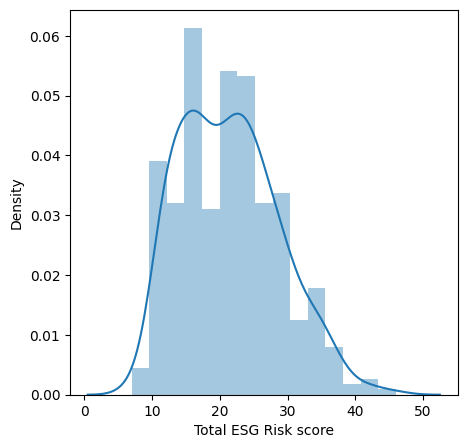

<ipython-input-224-ad53aa8a3648>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


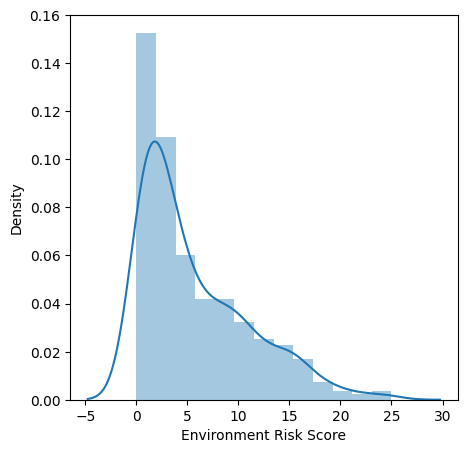

<ipython-input-224-ad53aa8a3648>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


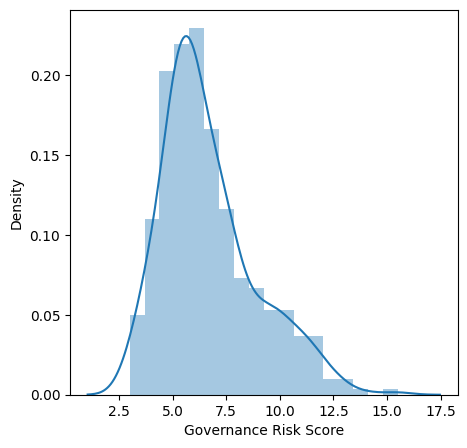

<ipython-input-224-ad53aa8a3648>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


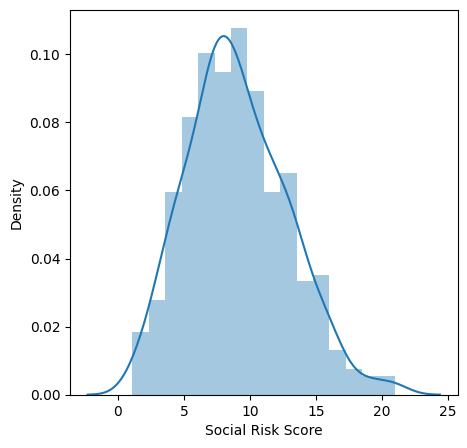

<ipython-input-224-ad53aa8a3648>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var])


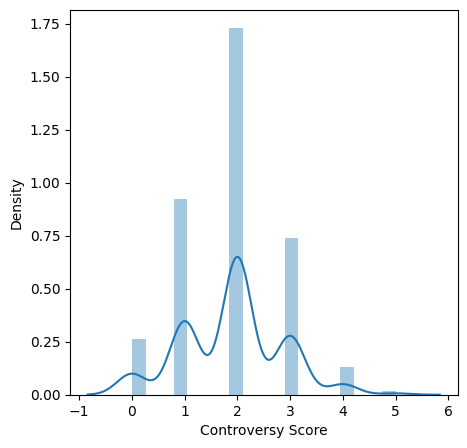

In [224]:
#CHECKING THE DISTRIBUTION PLOT OF THE NUMERICAL FEATURES

num_var = ['Total ESG Risk score', 'Environment Risk Score',
       'Governance Risk Score', 'Social Risk Score', 'Controversy Score']

for i,var in enumerate(num_var):
    plt.figure(figsize=(5,5))
    sns.distplot(df[var])
    plt.show()

<ipython-input-225-c7edc0ddd9a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


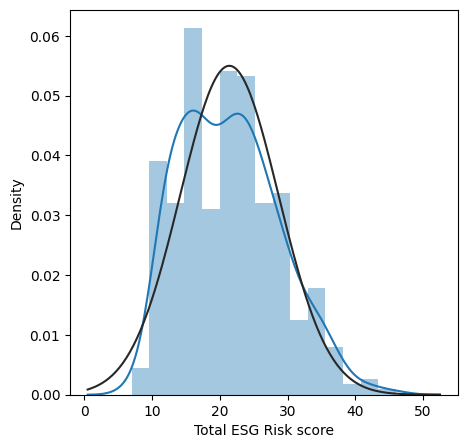

<ipython-input-225-c7edc0ddd9a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


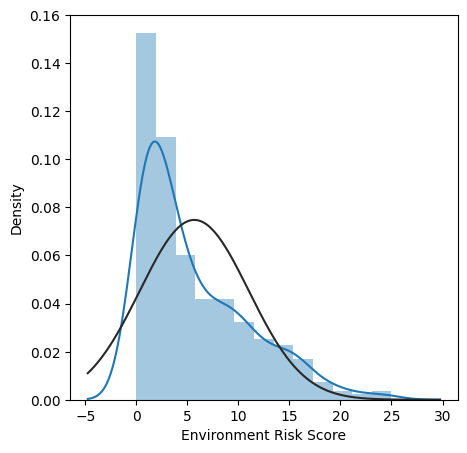

<ipython-input-225-c7edc0ddd9a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


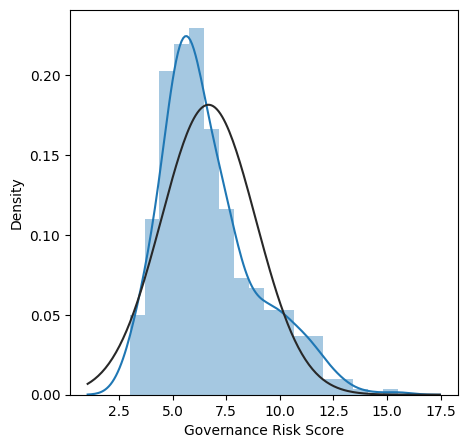

<ipython-input-225-c7edc0ddd9a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


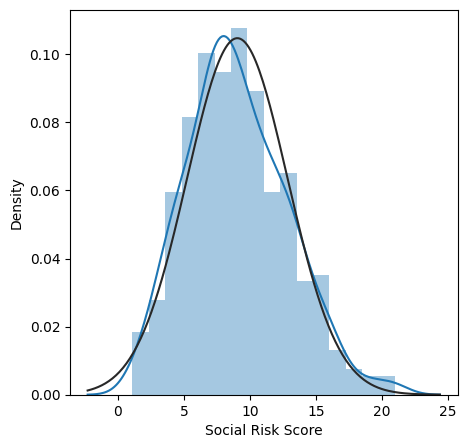

<ipython-input-225-c7edc0ddd9a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var],fit = norm)


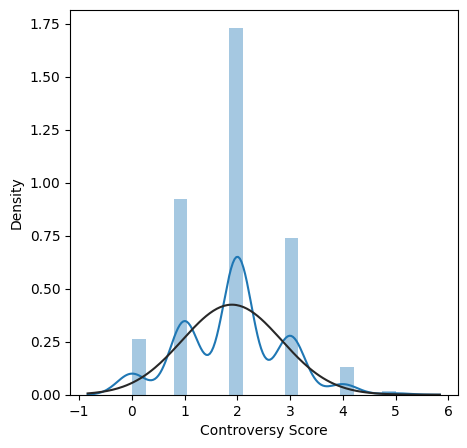

In [225]:
#CHECKING THE DISTRIBUTION PLOT OF THE NUMERICAL FEATURES

num_var = ['Total ESG Risk score', 'Environment Risk Score',
       'Governance Risk Score', 'Social Risk Score', 'Controversy Score']

for i,var in enumerate(num_var):
    plt.figure(figsize=(5,5))
    sns.distplot(df[var],fit = norm)
    plt.show()

In [226]:
#NOW FILLING UP ALL MISSING VALUES USING SCIKIT LEARN LIBRARY

num_var = ['Total ESG Risk score', 'Environment Risk Score',
       'Governance Risk Score', 'Social Risk Score', 'Controversy Score']

#CREATING THE CLASS OF IMPUTER
imputer_median = SimpleImputer(strategy="median")

#FITTING THE MODEL
imputer_median.fit(df[num_var])

#CHECKING THE CONVERSION

print("ALL MEDIAN VALUES OF THE FEATURES")
print("--------------------------------------------")
imputer_median.statistics_

ALL MEDIAN VALUES OF THE FEATURES
--------------------------------------------


array([21. ,  3.8,  6. ,  8.7,  2. ])

In [227]:
#NOW PUTTING THE MEDIAN VALUES INSIDE THE DATASET

df[num_var] = imputer_median.transform(df[num_var])

In [228]:
#GETTING ALL THE CATEGORICAL VALUES

cat_var = df.select_dtypes(include=["O"]).columns
print("ALL THE CATEGORICAL VALUES PRESENT IN THE DATASET :",cat_var)

ALL THE CATEGORICAL VALUES PRESENT IN THE DATASET : Index(['Symbol', 'Name', 'Address', 'Sector', 'Industry',
       'Full Time Employees', 'Description', 'Controversy Level',
       'ESG Risk Percentile', 'ESG Risk Level'],
      dtype='object')


In [229]:
cat_var = [ 'Address', 'Sector', 'Industry',
       'Full Time Employees', 'Description', 'Controversy Level',
       'ESG Risk Percentile', 'ESG Risk Level']

#CREATING THE CLASS OF IMPUTER
imputer_most_frequent = SimpleImputer(strategy="most_frequent")

#FITTING THE MODEL
imputer_most_frequent.fit(df[cat_var])

#CHECKING THE CONVERSION

print("ALL MODE VALUES OF THE FEATURES")
print("-------------------------------")
imputer_most_frequent.statistics_

ALL MODE VALUES OF THE FEATURES
-------------------------------


array(['1211 Avenue of the Americas\nNew York, NY 10036\nUnited States\n212 416 3400\nhttps://newscorp.com',
       'Technology', 'Utilities—Regulated Electric', '25,000',
       'Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; and Fitbit wearable devices, Google Nest home products, Pixel phones, and other devices, as well as in the provision of YouTube non-advertising services. The Google Cloud segment offers infrastructure, cybersecurity, data, analytics, AI, and machine learning, and other services; Google Workspace tha

In [230]:
#NOW PUTTING THE MEDIAN VALUES INSIDE THE DATASET


df[cat_var] = imputer_most_frequent.transform(df[cat_var])

In [231]:
#NOW CHECKING THE NULL VALUES

print("NUMBER OF NULL VALUES IN ALL FEATURES")
print("-------------------------------------")
df.isnull().sum()

NUMBER OF NULL VALUES IN ALL FEATURES
-------------------------------------


Symbol                    0
Name                      0
Address                   0
Sector                    0
Industry                  0
Full Time Employees       0
Description               0
Total ESG Risk score      0
Environment Risk Score    0
Governance Risk Score     0
Social Risk Score         0
Controversy Level         0
Controversy Score         0
ESG Risk Percentile       0
ESG Risk Level            0
dtype: int64

<Axes: >

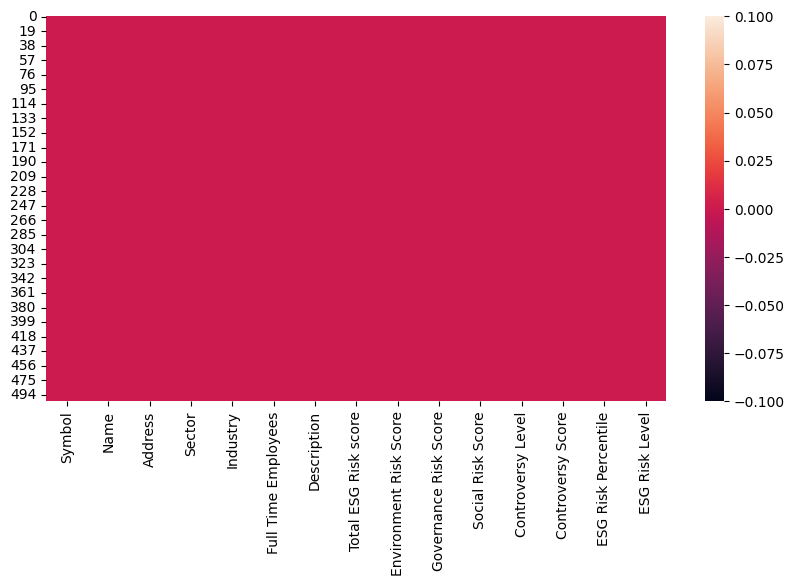

In [232]:
#CHECKING NULL VALUE ON THE HEATMAP

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

ALL THE MISSING VALUES ARE HANDLED

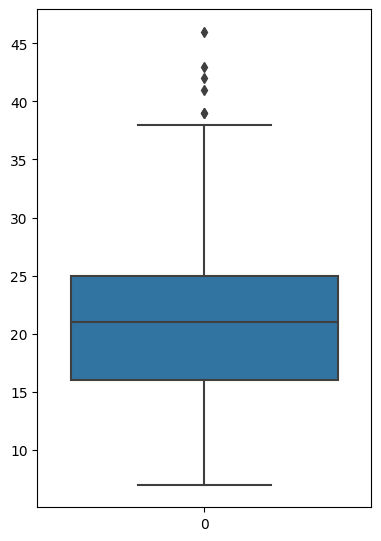

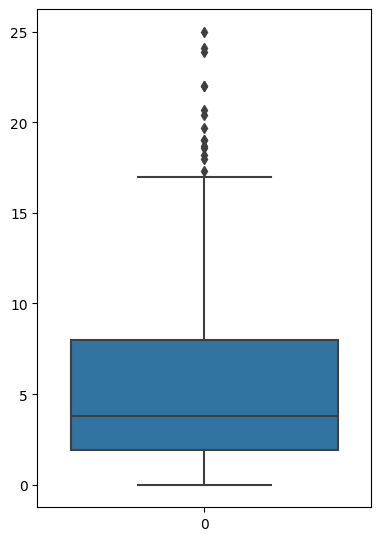

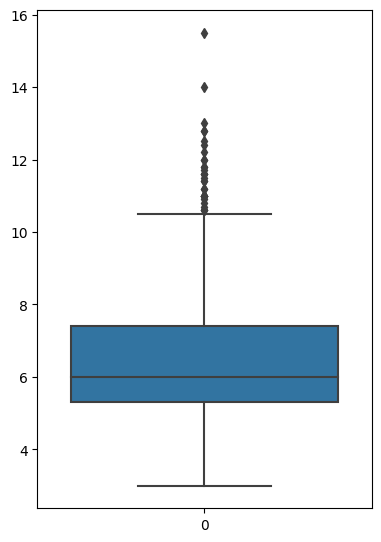

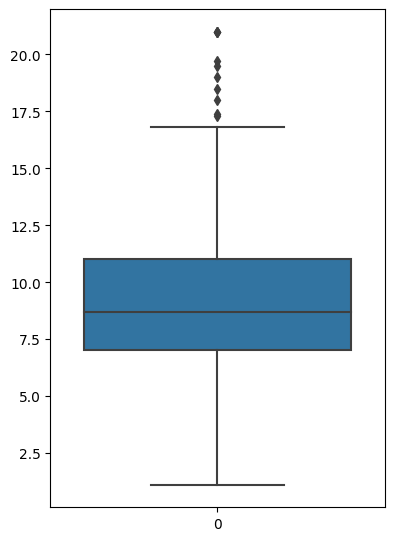

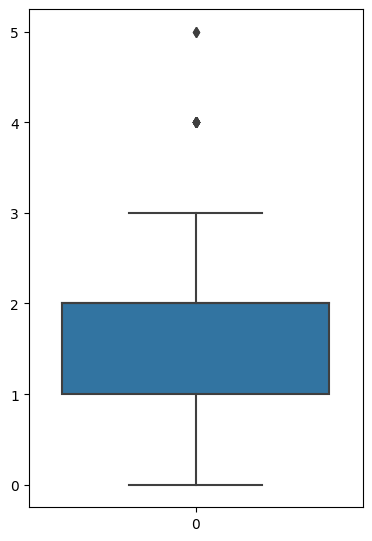

In [233]:
#USING BOXPLOT FOR GETTING THE OUTLIERS

for i,var in enumerate(num_var):
    plt.figure(figsize=(25,22))
    plt.subplot(3,5,i+1)
    sns.boxplot(df[var])
    plt.show()

DATASET CONTAINS OUTLIERS

In [234]:
#CALCULATING 1ST , 3RD QUANTILE AND INTERQUANTILE RANGE AND

for i, var in enumerate(df[num_var]):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1

    print("--------------------------------------------------")
    print("25th percentile(q1) value of feature ", var,":" ,q1 )
    print("75th percentile(q3) value of feature", var,":" ,q3 )
    print("IQR of feature ", var,":" ,iqr )
    print("--------------------------------------------------")


--------------------------------------------------
25th percentile(q1) value of feature  Total ESG Risk score : 16.0
75th percentile(q3) value of feature Total ESG Risk score : 25.0
IQR of feature  Total ESG Risk score : 9.0
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  Environment Risk Score : 1.9
75th percentile(q3) value of feature Environment Risk Score : 8.0
IQR of feature  Environment Risk Score : 6.1
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  Governance Risk Score : 5.3
75th percentile(q3) value of feature Governance Risk Score : 7.4
IQR of feature  Governance Risk Score : 2.1000000000000005
--------------------------------------------------
--------------------------------------------------
25th percentile(q1) value of feature  Social Risk Score : 7.0
75th percentile(q3) value of feature So

In [235]:
#CALCULATING UPPER AND LOWER LIMITS

def limits(feature,q1,q3,iqr):
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    print("upper limit ( ", feature, " )" , " : ", upper_limit)
    print("lower limit ( ", feature, " )" , " : ", lower_limit)
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")


limits("Total ESG Risk score",  16.00,25.00, 9.0)
limits(" Environment Risk Score", 1.9, 8.0,6.1)
limits("Governance Risk Score", 5.3, 7.4,2.1000000000000005)
limits("Social Risk Score" ,7.0, 11.0, 4.0 )
limits("Controversy Score" ,1.0 ,2.0,1.0)


upper limit (  Total ESG Risk score  )  :  38.5
lower limit (  Total ESG Risk score  )  :  2.5
--------------------------------------------------------
--------------------------------------------------------
upper limit (   Environment Risk Score  )  :  17.15
lower limit (   Environment Risk Score  )  :  -7.249999999999998
--------------------------------------------------------
--------------------------------------------------------
upper limit (  Governance Risk Score  )  :  10.55
lower limit (  Governance Risk Score  )  :  2.149999999999999
--------------------------------------------------------
--------------------------------------------------------
upper limit (  Social Risk Score  )  :  17.0
lower limit (  Social Risk Score  )  :  1.0
--------------------------------------------------------
--------------------------------------------------------
upper limit (  Controversy Score  )  :  3.5
lower limit (  Controversy Score  )  :  -0.5
------------------------------------------

In [236]:
#CAPPING - changing the outliers to upper and lower limits

def cap_out_lier(var,upper_limit,lower_limit):
    df[var]=np.where(
    df[var]>upper_limit,
    upper_limit,
    np.where(
    df[var]<lower_limit,
    lower_limit,
    df[var]))

cap_out_lier("Total ESG Risk score",  38.5,2.5)
cap_out_lier("Environment Risk Score", 17.15, -7.249999999999998)
cap_out_lier("Governance Risk Score", 10.55,2.149999999999999 )
cap_out_lier("Social Risk Score" , 17.0, 1.0 )
cap_out_lier("Controversy Score" , 3.5, -0.5 )


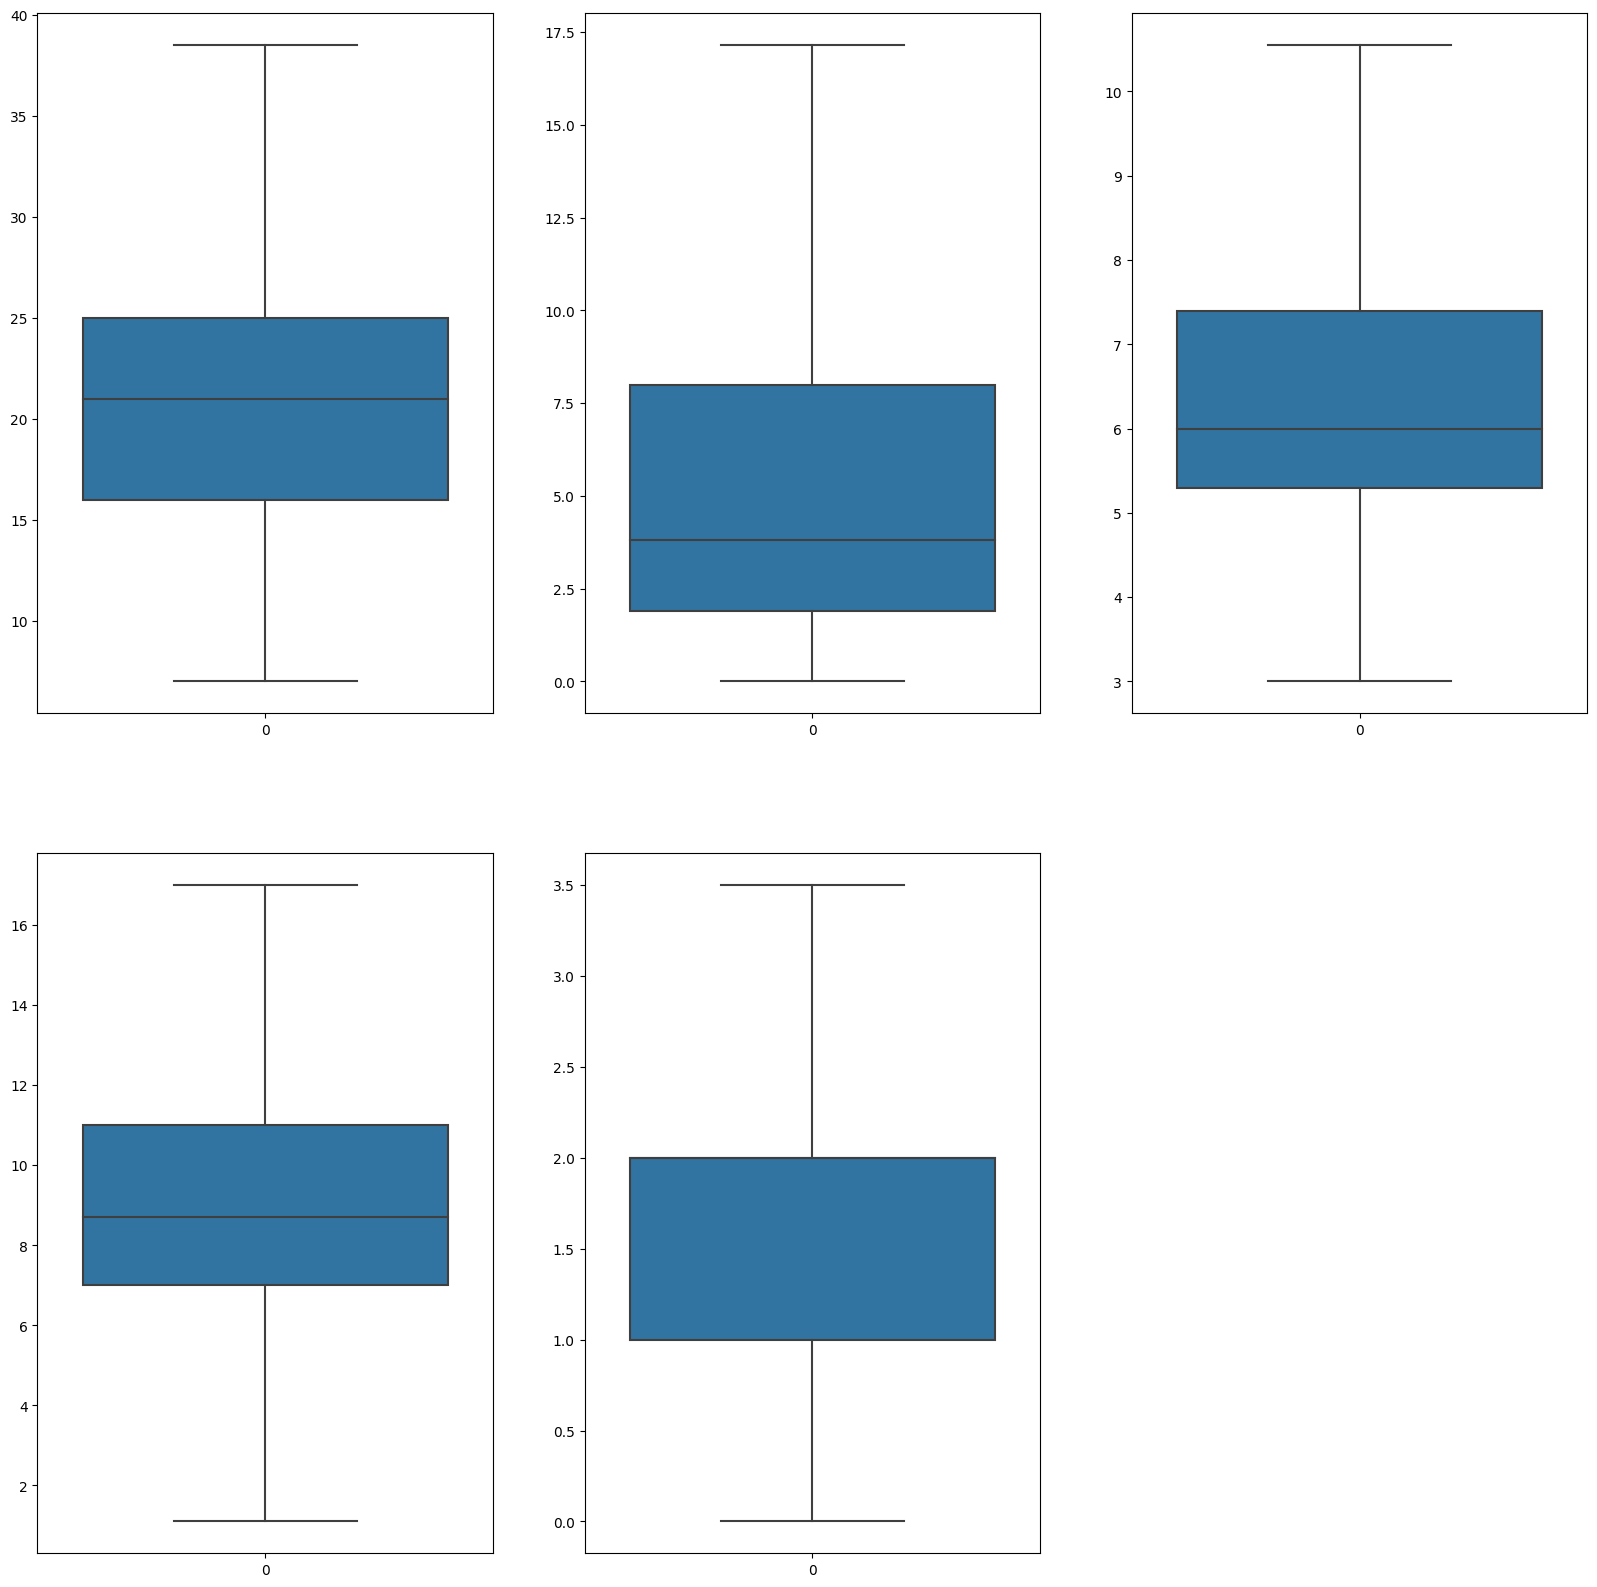

In [237]:
#PLOTTING BOXPLOT TO CHECK OUTLIERS IN THE DATAFRAME

plt.figure(figsize=(20,20))
for i , var in enumerate(num_var):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[var])
    plt.show

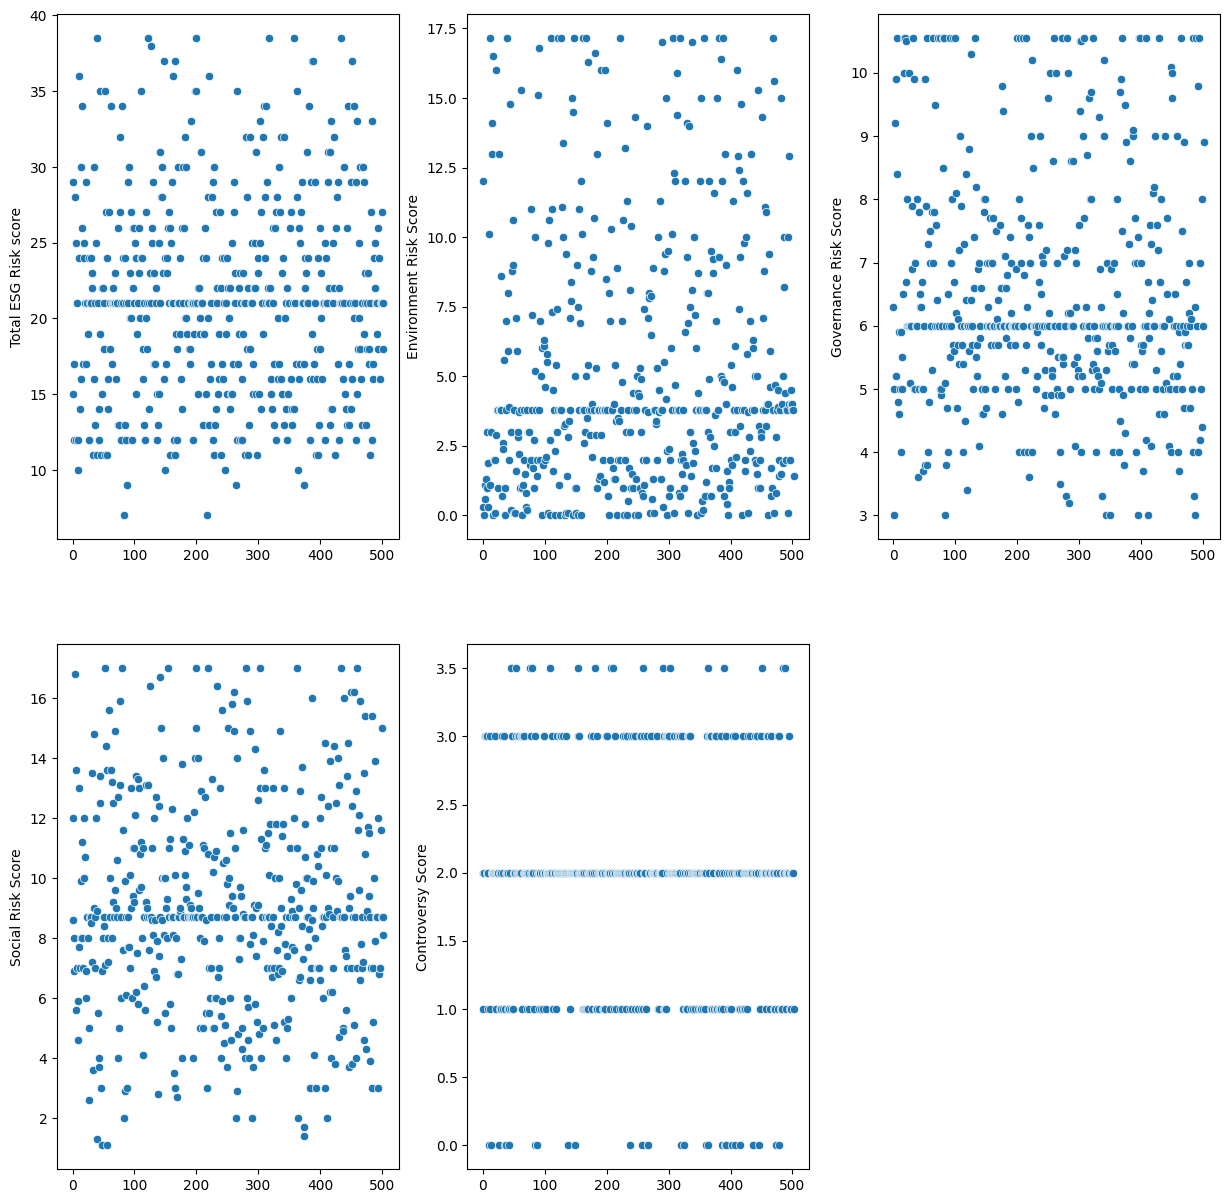

In [238]:
#PLOTTING SCATTER PLOT TO CHECK OUTLIERS IN THE DATAFRAME

plt.figure(figsize=(15,15))
for i , var in enumerate(num_var):
    plt.subplot(2,3,i+1)
    sns.scatterplot(df[var])
    plt.show

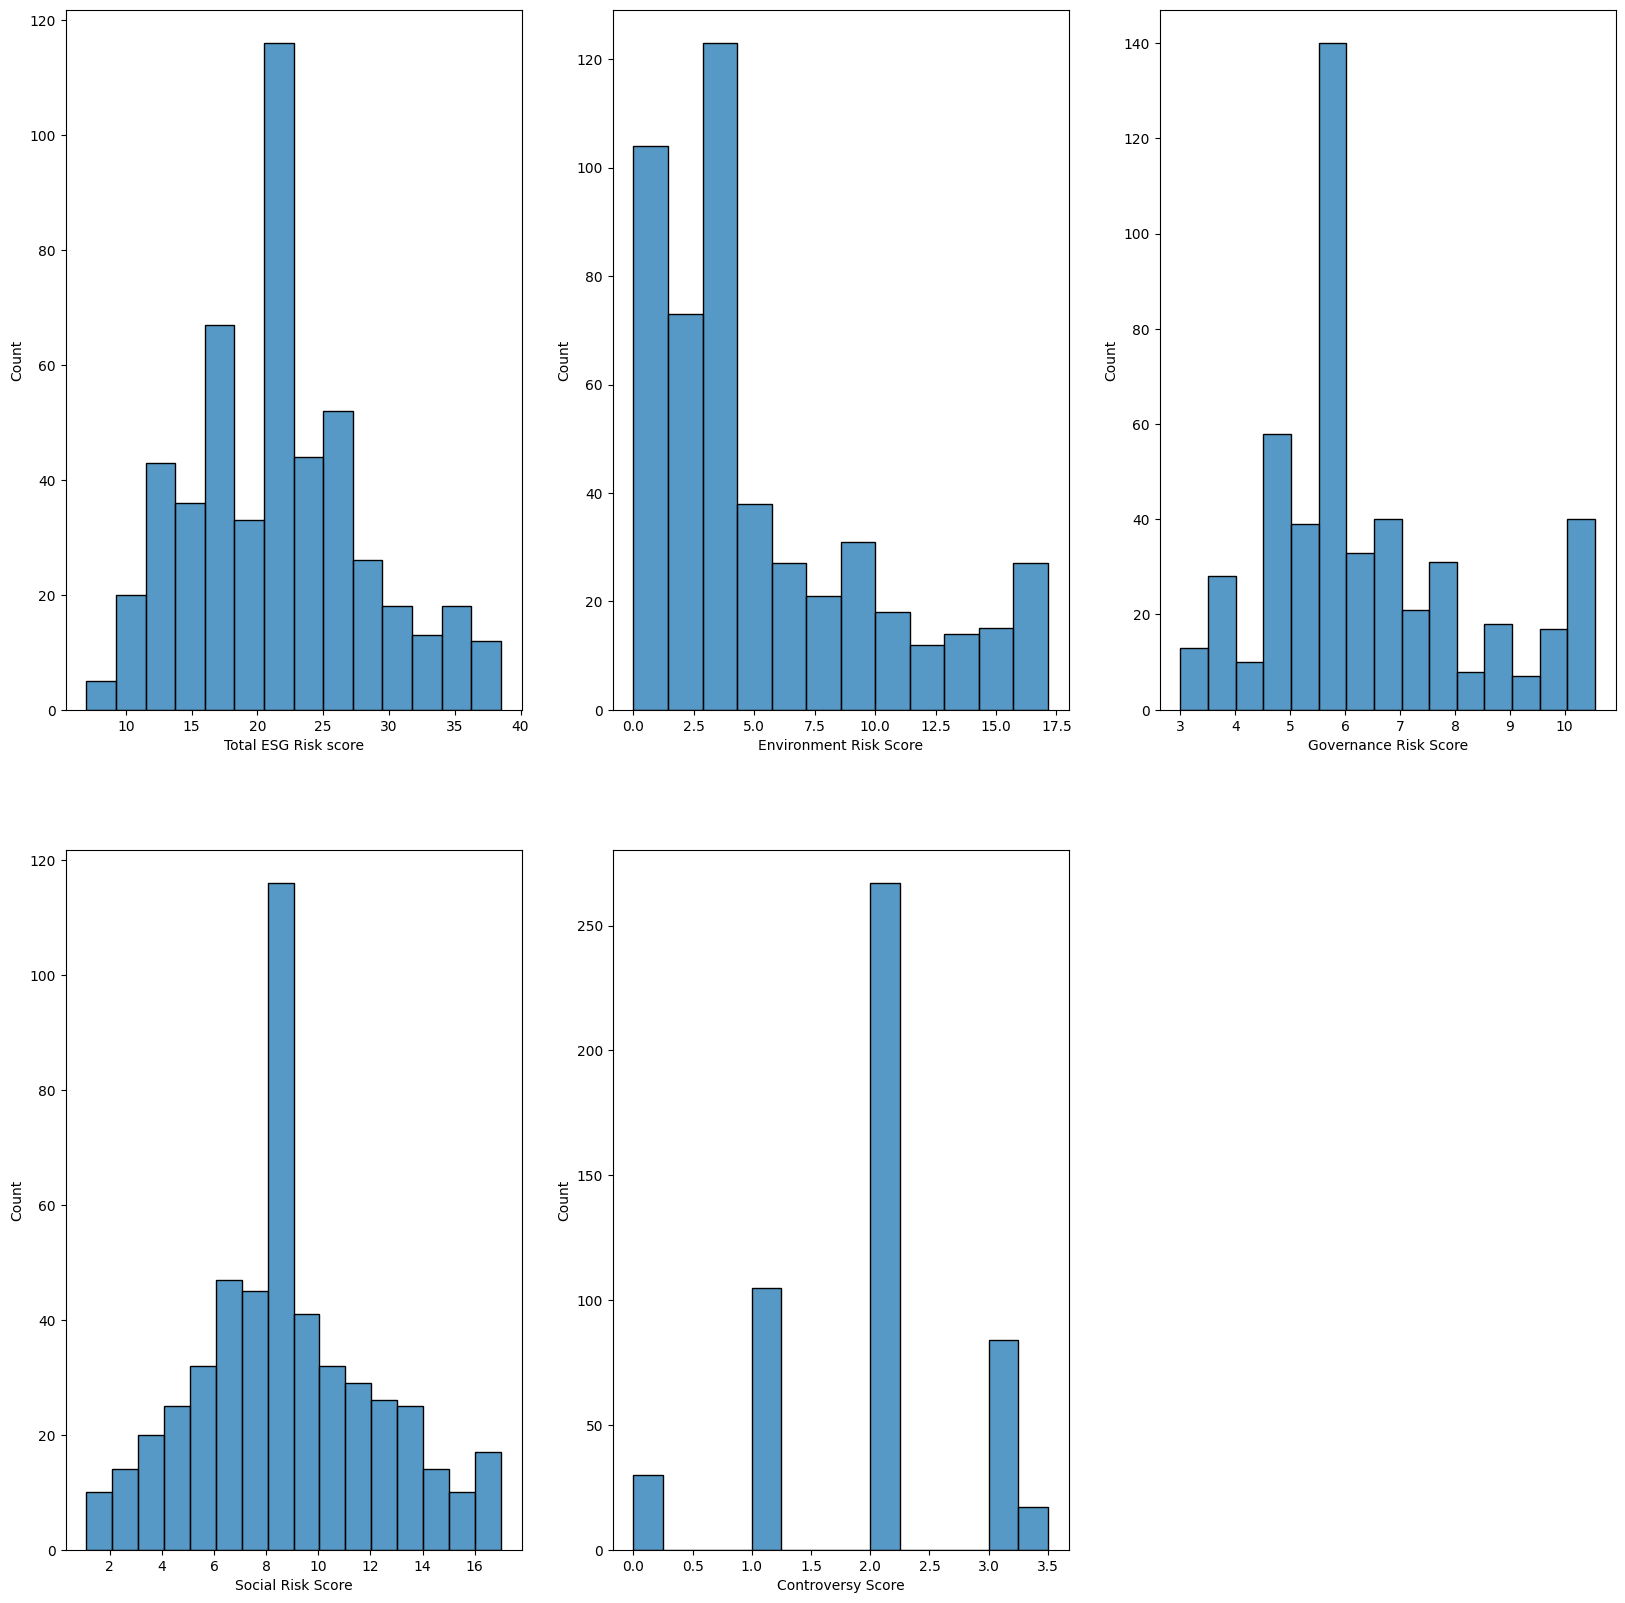

In [239]:
#PLOTTING HISTOGRAM TO CHECK OUTLIERS IN THE DATAFRAME

plt.figure(figsize=(20,20))
for i , var in enumerate(num_var):
    plt.subplot(2,3,i+1)
    sns.histplot(df[var])
    plt.show

ALL THE OUTLIERS IN THE DATASET ARE HANDLED EFFICIENTLY

In [240]:
#ORDINAL ENCODING

ordinal_label_Symbol = {k: i for i, k in enumerate(df["Symbol"].unique(),0)}
ordinal_label_Sector = {k: i for i, k in enumerate(df["Sector"].unique(),0)}
ordinal_label_Industry = {k: i for i, k in enumerate(df["Industry"].unique(),0)}
ordinal_label_Controversy_Level = {k: i for i, k in enumerate(df["Controversy Level"].unique(),0)}
ordinal_label_ESG_Risk_Percentile = {k: i for i, k in enumerate(df["ESG Risk Percentile"].unique(),0)}
ordinal_label_ESG_Risk_Level = {k: i for i, k in enumerate(df["ESG Risk Level"].unique(),0)}
ordinal_label_Full_Time_Employees = {k: i for i, k in enumerate(df["Full Time Employees"].unique(),0)}

In [241]:
#MAPPING FOR ORDINAL ENCODING

df["Symbol"] = df["Symbol"].map(ordinal_label_Symbol)
df["Sector"] = df["Sector"].map(ordinal_label_Sector)
df["Industry"] = df["Industry"].map(ordinal_label_Industry)
df["Controversy Level"] = df["Controversy Level"].map(ordinal_label_Controversy_Level)
df["ESG Risk Percentile"] = df["ESG Risk Percentile"].map(ordinal_label_ESG_Risk_Percentile)
df["ESG Risk Level"] = df["ESG Risk Level"].map(ordinal_label_ESG_Risk_Level)
df["Full Time Employees"] = df["Full Time Employees"].map(ordinal_label_Full_Time_Employees)

In [242]:
#DROPPING THE UNWANTED COLUMNS

main_df = df.drop(columns = ["Name","Address","Description"])

In [243]:
#CHECKING THE DESCRIPTION

main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Symbol,503.0,251.000000,145.347859,0.0,125.5,251.0,376.5,502.00
Sector,503.0,3.727634,2.893077,0.0,1.0,3.0,6.0,10.00
Industry,503.0,40.174950,29.110882,0.0,14.0,37.0,59.5,113.00
Full Time Employees,503.0,179.168986,117.241184,0.0,70.0,172.0,278.5,397.00
Total ESG Risk score,503.0,21.326044,6.629198,7.0,16.0,21.0,25.0,38.50
Environment Risk Score,503.0,5.319384,4.707180,0.0,1.9,3.8,8.0,17.15
Governance Risk Score,503.0,6.504473,1.859718,3.0,5.3,6.0,7.4,10.55
Social Risk Score,503.0,8.952485,3.417215,1.1,7.0,8.7,11.0,17.00
Controversy Level,503.0,1.067594,0.844129,0.0,1.0,1.0,1.0,5.00
Controversy Score,503.0,1.889662,0.824339,0.0,1.0,2.0,2.0,3.50


In [244]:

#NOW CHECKING THE HEAD OF THE FILE

main_df.head()

,Symbol,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,0,0,0,0,15.0,0.3,6.3,8.6,0,1.0,0,0
1,1,1,1,1,29.0,12.0,5.0,12.0,1,2.0,1,1
2,2,2,2,2,12.0,0.0,3.0,8.0,1,2.0,2,2
3,3,3,3,3,17.0,0.6,9.2,6.9,2,3.0,3,0
4,4,0,4,4,28.0,1.1,9.9,16.8,2,3.0,4,1


ALL THE CATEGORICAL FEATURES ARE ENCODED SUCCESSFULLY

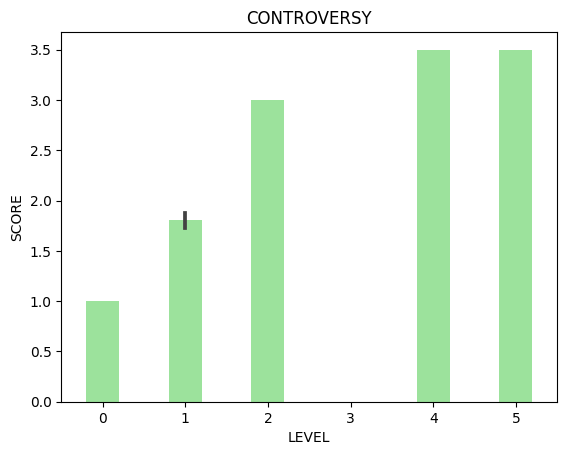

In [278]:
#VISUALISING THE DATA

#COMPARING THE GRAPH

sns.barplot(x = "Controversy Level",y="Controversy Score",data=main_df,width=0.4,color ="LightGreen")
plt.xlabel("LEVEL")
plt.ylabel("SCORE")
plt.title("CONTROVERSY")
plt.show()

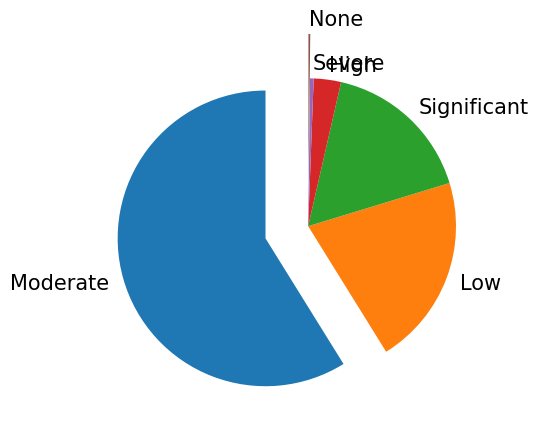

In [246]:
#CHECKING TEH CONTROVERSY LEVEL

C_index = ["Moderate","Low","Significant","High","Severe","None"]
C_value = [296,105,84,15,2,1]

plt.pie(C_value,labels = C_index,textprops = {"fontsize":15},explode = [0.3,0,0,0.0,0,0.3],startangle = 90)
plt.show()

<BarContainer object of 6 artists>

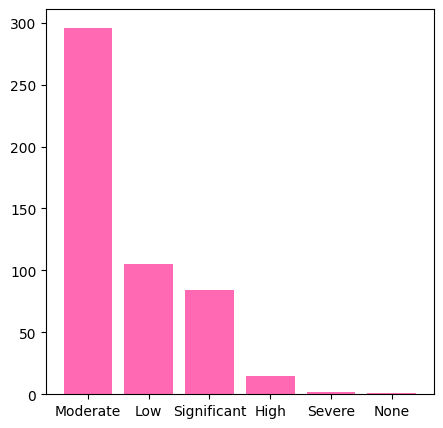

In [279]:
plt.figure(figsize = (5,5))

plt.bar(C_index,C_value,color="hotpink")

ALLMOST MORE THAN 50 PERCENT CONTROVERSIES ARE AT MODERATE LEVEL

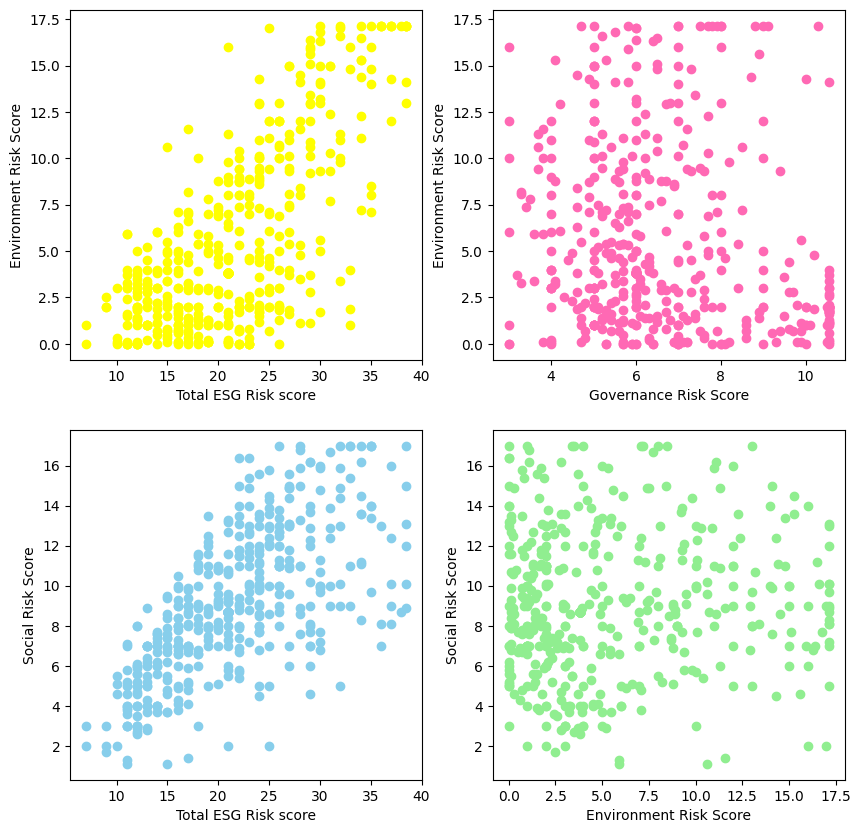

In [248]:
#CHECKING ALL THE RISK SCORE

plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.scatter(main_df["Total ESG Risk score"],main_df["Environment Risk Score"],color = "yellow")
plt.xlabel("Total ESG Risk score")
plt.ylabel("Environment Risk Score")

plt.subplot(2,2,2)
plt.scatter(main_df["Governance Risk Score"],main_df["Environment Risk Score"],color = "hotpink")
plt.xlabel("Governance Risk Score")
plt.ylabel("Environment Risk Score")

plt.subplot(2,2,3)
plt.scatter(main_df["Total ESG Risk score"],main_df["Social Risk Score"],color = "skyblue")
plt.xlabel("Total ESG Risk score")
plt.ylabel("Social Risk Score")

plt.subplot(2,2,4)
plt.scatter(main_df["Environment Risk Score"],main_df["Social Risk Score"],color = "Lightgreen")
plt.xlabel("Environment Risk Score")
plt.ylabel("Social Risk Score")
plt.show()

In [249]:
#SPLITTING THE DATASET

X = main_df.drop("Symbol",axis = 1)
y = main_df["Symbol"]

In [250]:
#NOW, SPLITTING THE DATA INTO X TRAIN AND TEST AND Y TRAIN AND TEST

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=52)

print("The Shape of the Training data = ",X_train.shape)
print("The Shape of the Training dependent data = ",y_train.shape)
print("The Shape of the test data = ",X_test.shape)
print("The Shape of the test pred data = ",y_test.shape)

The Shape of the Training data =  (402, 11)
The Shape of the Training dependent data =  (402,)
The Shape of the test data =  (101, 11)
The Shape of the test pred data =  (101,)


THE DATA HAVE BEEN SPLITTED INTO TRAIN AND TEST DATASET

In [251]:
#FEATURE SELECTION

#CHECKING THE CORRELATION

X_train.corr()

,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
Sector,1.000000,0.181332,0.097569,0.162004,0.350091,-0.030157,-0.215702,-0.035694,-0.055752,0.015111,0.186156
Industry,0.181332,1.000000,0.325001,0.009869,0.063035,-0.125461,0.001920,0.084017,0.147113,0.019427,0.013064
Full Time Employees,0.097569,0.325001,1.000000,0.006716,0.058666,-0.053709,-0.039312,-0.054314,-0.033775,0.113561,-0.050300
Total ESG Risk score,0.162004,0.009869,0.006716,1.000000,0.702691,0.381660,0.653158,0.258575,0.326097,0.403346,0.603622
Environment Risk Score,0.350091,0.063035,0.058666,0.702691,1.000000,-0.173051,0.015398,0.054348,0.085009,0.300474,0.501028
Governance Risk Score,-0.030157,-0.125461,-0.053709,0.381660,-0.173051,1.000000,0.423155,0.133608,0.180708,0.214070,0.133841
Social Risk Score,-0.215702,0.001920,-0.039312,0.653158,0.015398,0.423155,1.000000,0.329196,0.386999,0.296674,0.315169
Controversy Level,-0.035694,0.084017,-0.054314,0.258575,0.054348,0.133608,0.329196,1.000000,0.773900,0.113468,0.105427
Controversy Score,-0.055752,0.147113,-0.033775,0.326097,0.085009,0.180708,0.386999,0.773900,1.000000,0.121230,0.104294
ESG Risk Percentile,0.015111,0.019427,0.113561,0.403346,0.300474,0.214070,0.296674,0.113468,0.121230,1.000000,0.204123


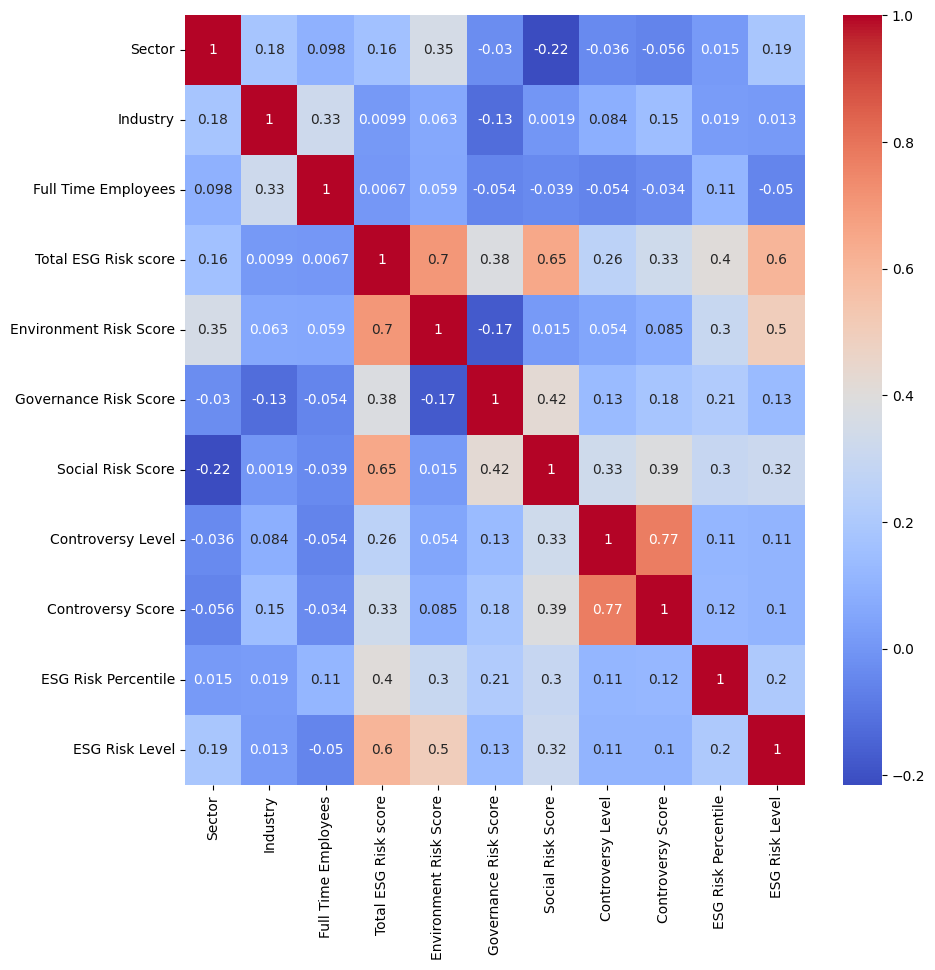

In [252]:
#Using Pearson Correlation

plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()

In [253]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [254]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

0

In [262]:
#NOW, SELECTING FEATURE BY USING CHI2 SCORE

#CREATING A CLASS
f_p_value = chi2(X_train,y_train)
f_p_value

(array([  871.46856386,  8260.35778815, 30489.88293218,   804.3776895 ,
         1723.0781728 ,   217.5209745 ,   498.56065514,   262.20567376,
          144.11345646,  6310.02263324,   389.91759465]),
 array([6.39721853e-037, 0.00000000e+000, 0.00000000e+000, 2.91626413e-029,
        6.21986120e-163, 1.00000000e+000, 6.34972206e-004, 9.99999989e-001,
        1.00000000e+000, 0.00000000e+000, 6.44829958e-001]))

In [269]:
#GETTING ALL THE p_values

p_values = pd.Series(f_p_value[1])
p_values.index = X_train.columns
p_values

Sector                     6.397219e-37
Industry                   0.000000e+00
Full Time Employees        0.000000e+00
Total ESG Risk score       2.916264e-29
Environment Risk Score    6.219861e-163
Governance Risk Score      1.000000e+00
Social Risk Score          6.349722e-04
Controversy Level          1.000000e+00
Controversy Score          1.000000e+00
ESG Risk Percentile        0.000000e+00
ESG Risk Level             6.448300e-01
dtype: float64

In [270]:
#SORTING THE INDEX

p_values.sort_index(ascending=False)

Total ESG Risk score       2.916264e-29
Social Risk Score          6.349722e-04
Sector                     6.397219e-37
Industry                   0.000000e+00
Governance Risk Score      1.000000e+00
Full Time Employees        0.000000e+00
Environment Risk Score    6.219861e-163
ESG Risk Percentile        0.000000e+00
ESG Risk Level             6.448300e-01
Controversy Score          1.000000e+00
Controversy Level          1.000000e+00
dtype: float64

In [275]:
X_train_sel = X_train.drop(columns = ["Controversy Score","Controversy Level"])
X_test_sel = X_test.drop(columns = ["Controversy Score","Controversy Level"])

FEATURES HAVE BEEN SELECTED WITH HIGHEST IMPORTANCE LEVEL.

In [276]:
#FEATURE SELECTION

sc = StandardScaler()
sc.fit(X_train_sel)

X_train_sc = sc.transform(X_train_sel)
X_test_sc = sc.transform(X_test_sel)

In [277]:
#CONVERTING THE ARRAY INTO DATAFRAME

X_train_sc = pd.DataFrame(X_train_sel,columns = ['Total ESG Risk score', 'Social Risk Score', 'Sector', 'Industry', 'Governance Risk Score',
       'Full Time Employees', 'Environment Risk Score', 'ESG Risk Percentile', 'ESG Risk Level'])
X_test_sc = pd.DataFrame(X_test_sel,columns = ['Total ESG Risk score', 'Social Risk Score', 'Sector', 'Industry', 'Governance Risk Score',
       'Full Time Employees', 'Environment Risk Score', 'ESG Risk Percentile', 'ESG Risk Level'])

DATA HAS BEEN STANDARISED